In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)


In [4]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.03%


In [7]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



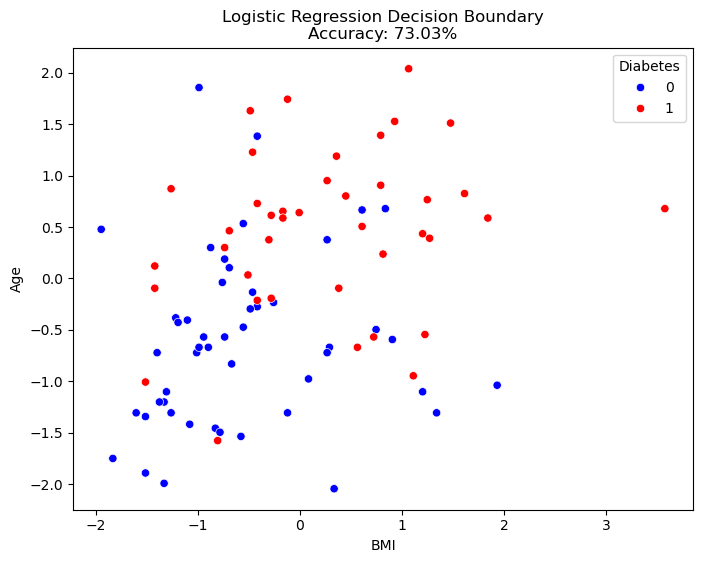

In [8]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()


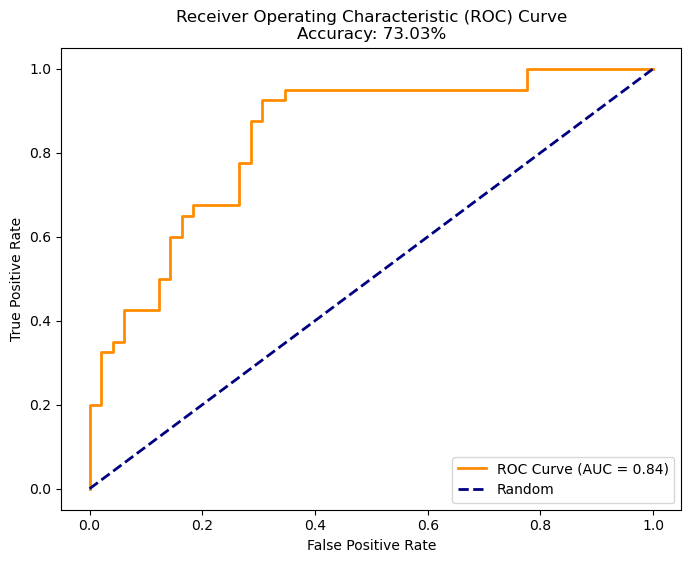

In [9]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()


In [10]:
import pandas as pd
diabetes = load_diabetes()

In [11]:
db_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [12]:
db_df['target'] = diabetes.target


In [13]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
